In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# Gerando dados para as ações
np.random.seed(0)
n_samples= 100
symbols = ['AAPL','GOOGLE','MSFT','AMZN','TSLA','FB']
prices = np.random.uniform(50,4000,n_samples)
volume = np.random.randint(100000,500000,n_samples)
market_cap = np.random.uniform(1e10,2e12,n_samples)
data = pd.DataFrame({
    'Símbolo':np.random.choice(symbols,n_samples),
    'Preço':prices,
    'Volume':volume,
    'Capitalização de mercado':market_cap
})

In [14]:
data.head()

,Símbolo,Preço,Volume,Capitalização de mercado
0,FB,2217.813341,452893,8.459500e+11
1,GOOGLE,2874.997997,264610,1.106703e+11
2,AAPL,2430.915335,108286,7.373373e+11
3,FB,2202.288573,471938,4.308967e+10
4,AAPL,1723.436457,204299,4.691772e+11


In [18]:
# Realizando o agrupamento com kmeans
data_n = pd.get_dummies(data,columns=['Símbolo'], drop_first= True)

In [20]:
features = data_n[['Preço','Volume','Capitalização de mercado']]

In [21]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(features)

KeyError: 'Cluster'

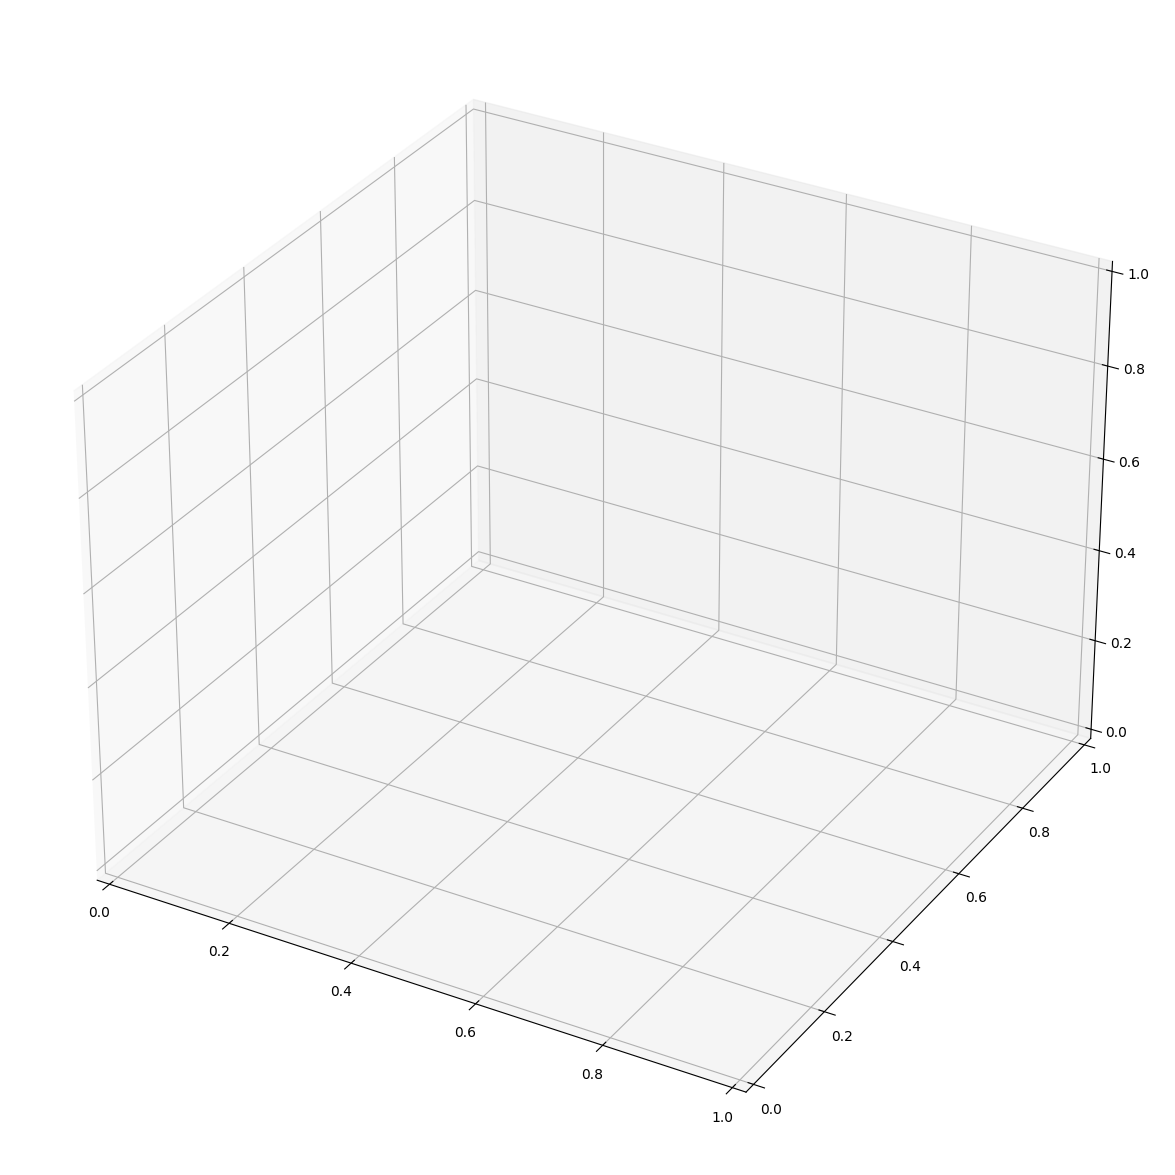

In [22]:
# Visualizando os grupos no grafico 3d
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
for cluster in data_n['Cluster'].unique():
    cluster_data=data_n[data_n['Cluster']==cluster]
    ax.scatter(cluster_data['Preço'],cluster_data['Volume'],
               cluster_data['Capitalização de mercado'],
               label=f'Cluster{cluster}')
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Volume de negociação')
ax.set_zlabel('Capitalização de mercado')
plt.legend()
plt.show()

# Analisando os clusters
cluster_means = data_n.groupby('Cluster').mean()
print(cluster_means)